In [ ]:
# Maksym Lesyk, 614228

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [ ]:
# read datasets
bl1=pd.read_csv("/content/drive/MyDrive/Datasets_MS_inf/bvd_contact_info_berlin.csv")
bl2=pd.read_csv('/content/drive/MyDrive/Datasets_MS_inf/bvd_fin_data_berlin.csv')
bl3=pd.read_csv('/content/drive/MyDrive/Datasets_MS_inf/bvd_industry_info_berlin.csv')
st1=pd.read_csv('/content/drive/MyDrive/Datasets_MS_inf/bvd_contact_info_stockholm.csv')
st2=pd.read_csv('/content/drive/MyDrive/Datasets_MS_inf/bvd_fin_data_stockholm.csv')
st3=pd.read_csv('/content/drive/MyDrive/Datasets_MS_inf/bvd_industry_info_stockholm.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# check size
print(bl1.shape[0])
print(bl2.shape[0])
print(bl3.shape[0])

226059
798509
658565


In [ ]:
# merge w/o financial data for now
bl_cd1 = pd.merge(bl1, bl3, how='left', on = 'BvD ID number')
st_cd1 = pd.merge(st1, st3, how='left', on = 'BvD ID number')

In [ ]:
# use NACE as industry identifier
bl_cd1["Classification"]=bl_cd1["NACE Rev. 2, Core code (4 digits)"]
st_cd1["Classification"]=st_cd1["NACE Rev. 2, Core code (4 digits)"]

In [ ]:
# tag and subset
bl_bc=bl_cd1[bl_cd1.Classification.astype(str).str.match("5630")]
bl_bc["Classification"]="Bars and Clubs"
bl_r=bl_cd1[bl_cd1.Classification.astype(str).str.match("5610")]
bl_r["Classification"]="Restaurants"
bl_h=bl_cd1[bl_cd1.Classification.astype(str).str.match("5510")]
bl_h["Classification"]="Hotels"
bl = pd.concat([bl_bc, bl_r,bl_h])

st_bc=st_cd1[st_cd1.Classification.astype(str).str.match("5630")]
st_bc["Classification"]="Bars and Clubs"
st_r=st_cd1[st_cd1.Classification.astype(str).str.match("5610")]
st_r["Classification"]="Restaurants"
st_h=st_cd1[st_cd1.Classification.astype(str).str.match("5510")]
st_h["Classification"]="Hotels"
st = pd.concat([st_bc, st_r,st_h])

<ipython-input-186-912007f4554d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bl_bc["Classification"]="Bars and Clubs"
<ipython-input-186-912007f4554d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bl_r["Classification"]="Restaurants"
<ipython-input-186-912007f4554d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
# we can see that there are ifferent formats
print(np.unique(bl2[['Closing date']].values))

[    1980     1981     1982 ... 20220117 20220118 20220124]


In [ ]:
# correct this
bl2['year'] = bl2['Closing date'].astype(str).str[:4]
st2['year'] = st2['Closing date'].astype(str).str[:4]

In [ ]:
# check
print(np.unique(bl2[['year']].values))
print(np.unique(st2[['year']].values))

['1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
['1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993'
 '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003'
 '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']


In [ ]:
# convert back to numbers
bl2['year'] = bl2['year'].astype(int)
st2['year'] = st2['year'].astype(int)

In [ ]:
# subset into 3 years before and after Covid
bl2_a = bl2[bl2["year"] >= 2020]
bl2_b = bl2[(bl2['year'] < 2020) & (bl2['year'] > 2016)]
st2_b = st2[(st2['year'] < 2020) & (st2['year'] > 2016)]
st2_a = st2[st2["year"] >= 2020]

In [ ]:
# check
print(np.unique(bl2_a[['year']].values))
print(np.unique(bl2_b[['year']].values))
print(np.unique(st2_a[['year']].values))
print(np.unique(st2_b[['year']].values))

[2020 2021 2022]
[2017 2018 2019]
[2020 2021 2022]
[2017 2018 2019]


In [ ]:
# merge with financial data
bl_fa = pd.merge(bl, bl2_a, how='left', on = 'BvD ID number')
st_fa = pd.merge(st, st2_a, how='left', on = 'BvD ID number')
bl_fb = pd.merge(bl, bl2_b, how='left', on = 'BvD ID number')
st_fb = pd.merge(st, st2_b, how='left', on = 'BvD ID number')

In [ ]:
# check size
print(bl_fa.shape[0])
print(bl_fb.shape[0])
print(st_fa.shape[0])
print(st_fb.shape[0])

7301
9495
17578
24505


<BarContainer object of 10 artists>

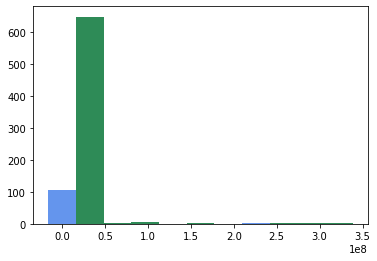

In [ ]:
# plot for difference Berlin
fig, ax = plt.subplots()
bl_fax=bl_fa
bl_fbx=bl_fb
bl_fax = bl_fax[bl_fax['Sales'].notna()]
bl_fbx = bl_fbx[bl_fbx['Sales'].notna()]
a_heights, a_bins = np.histogram(bl_fax['Sales'])
b_heights, b_bins = np.histogram(bl_fbx['Sales'], bins=a_bins)

width = (a_bins[1] - a_bins[0])

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

<BarContainer object of 10 artists>

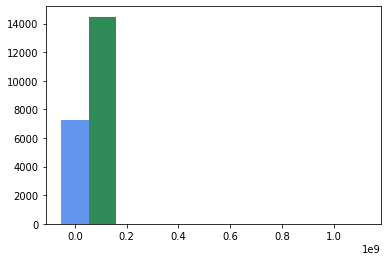

In [ ]:
# plot for difference Stockholm
fig, ax = plt.subplots()
st_fax=st_fa
st_fbx=st_fb
st_fax = st_fax[st_fax['Sales'].notna()]
st_fbx = st_fbx[st_fbx['Sales'].notna()]
a_heights, a_bins = np.histogram(st_fax['Sales'])
b_heights, b_bins = np.histogram(st_fbx['Sales'], bins=a_bins)

width = (a_bins[1] - a_bins[0])

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

In [ ]:
# seems weird
print(st_fbx['Sales'].mean()-st_fax['Sales'].mean())
print(bl_fbx['Sales'].mean()-bl_fax['Sales'].mean())

1082905.3188010736
-1475762.425845502


In [ ]:
# delete NAs
st_fax = st_fax[st_fax['Total assets'].notna()]
st_fbx = st_fbx[st_fbx['Total assets'].notna()]
bl_fax = bl_fax[bl_fax['Total assets'].notna()]
bl_fbx = bl_fbx[bl_fbx['Total assets'].notna()]

In [ ]:
# check size
print(st_fax.shape[0])
print(st_fbx.shape[0])
print(bl_fax.shape[0])
print(bl_fbx.shape[0])

7252
14512
109
676


In [ ]:
# create column ratio as profitability measure
st_fax["ROS"]=st_fax['Sales']/st_fax['Total assets']
st_fbx["ROS"]=st_fbx['Sales']/st_fbx['Total assets']
bl_fax["ROS"]=bl_fax['Sales']/bl_fax['Total assets']
bl_fbx["ROS"]=bl_fbx['Sales']/bl_fbx['Total assets']

<ipython-input-230-1a472043c328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_fax["ROS"]=st_fax['Sales']/st_fax['Total assets']
<ipython-input-230-1a472043c328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_fbx["ROS"]=st_fbx['Sales']/st_fbx['Total assets']
<ipython-input-230-1a472043c328>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
st_fbx['ROS']=st_fbx['ROS'].replace([np.inf, -np.inf], np.nan)
st_fax['ROS']=st_fax['ROS'].replace([np.inf, -np.inf], np.nan)

<ipython-input-231-7b40fa769575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_fbx['ROS']=st_fbx['ROS'].replace([np.inf, -np.inf], np.nan)
<ipython-input-231-7b40fa769575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_fax['ROS']=st_fax['ROS'].replace([np.inf, -np.inf], np.nan)


In [ ]:
st_fax=st_fax[st_fax['ROS'].notna()]
st_fbx=st_fbx[st_fbx['ROS'].notna()]
bl_fax=bl_fax[bl_fax['ROS'].notna()]
bl_fbx=bl_fbx[bl_fbx['ROS'].notna()]

In [ ]:
# we can see the difference between Berlin and Stockholm. Berlin's mean is twice less post-Covid, while Stockholm is almost unaffected
print(st_fbx['ROS'].replace([np.inf, -np.inf], np.nan).mean()/st_fax['ROS'].mean())
print(bl_fbx['ROS'].replace([np.inf, -np.inf], np.nan).mean()/bl_fax['ROS'].mean())

1.260125307823903
2.1008273450398622


In [ ]:
# aggregate by means
st1=st_fbx.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'NAME_NATIVE':'first','Classification':'first'})
st2=st_fax.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'NAME_NATIVE':'first','Classification':'first'})
bl1=bl_fbx.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'NAME_NATIVE':'first','Classification':'first'})
bl2=bl_fax.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'NAME_NATIVE':'first','Classification':'first'})

In [ ]:
st1.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','NAME_NATIVE','Classification']
st2.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','NAME_NATIVE','Classification']
bl1.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','NAME_NATIVE','Classification']
bl2.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','NAME_NATIVE','Classification']

In [ ]:
st1=st1.reindex(columns=sorted(st1.columns))
st2=st2.reindex(columns=sorted(st2.columns))
bl1=bl1.reindex(columns=sorted(bl1.columns))
bl2=bl2.reindex(columns=sorted(bl2.columns))

In [ ]:
# join pre- nd post-Covid datasets for both cities together
bl = pd.concat([bl1, bl2])
st = pd.concat([st1, st2])

In [ ]:
# for Berlin, during filtering we can see that Bars and Clubs were completely excluded. Hotels were affected more than that of Restaurants (actually
#NACE groups together restaurants and delivery services, so this could be the case)
model = ols("ros_mn ~ Classification", data=bl)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ros_mn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6752
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.510
Time:                        14:27:18   Log-Likelihood:                -1120.3
No. Observations:                 456   AIC:                             2247.
Df Residuals:                     453   BIC:                             2259.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# for Stockholm we have data only for Restaurants
model = ols("ros_mn ~ Classification", data=st)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ros_mn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     32.15
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.46e-08
Time:                        14:27:26   Log-Likelihood:                -39557.
No. Observations:               11120   AIC:                         7.912e+04
Df Residuals:                   11118   BIC:                         7.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# include Capital
st_fax=st_fax[st_fax['Capital'].notna()]
st_fbx=st_fbx[st_fbx['Capital'].notna()]
bl_fax=bl_fax[bl_fax['Capital'].notna()]
bl_fbx=bl_fbx[bl_fbx['Capital'].notna()]

In [ ]:
# aggregate by means
st1=st_fbx.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'Capital':['mean'],'NAME_NATIVE':'first','Classification':'first'})
st2=st_fax.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'Capital':['mean'],'NAME_NATIVE':'first','Classification':'first'})
bl1=bl_fbx.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'Capital':['mean'],'NAME_NATIVE':'first','Classification':'first'})
bl2=bl_fax.groupby(['BvD ID number'], as_index=False).agg(
                      {'Total assets':['mean'],'ROS':['mean'],'Sales':['mean'],'Capital':['mean'],'NAME_NATIVE':'first','Classification':'first'})

In [ ]:
st1.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','cap_mn','NAME_NATIVE','Classification']
st2.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','cap_mn','NAME_NATIVE','Classification']
bl1.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','cap_mn','NAME_NATIVE','Classification']
bl2.columns = ['BvD ID number','ta_mn',"ros_mn",'s_mn','cap_mn','NAME_NATIVE','Classification']

In [ ]:
st1=st1.reindex(columns=sorted(st1.columns))
st2=st2.reindex(columns=sorted(st2.columns))
bl1=bl1.reindex(columns=sorted(bl1.columns))
bl2=bl2.reindex(columns=sorted(bl2.columns))

In [ ]:
# join pre- nd post-Covid datasets for both cities together
bl = pd.concat([bl1, bl2])
st = pd.concat([st1, st2])

In [ ]:
# a quite large influence of Capital
model = ols("ros_mn ~ Classification+cap_mn", data=st)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ros_mn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.20
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           9.40e-08
Time:                        14:45:41   Log-Likelihood:                -39554.
No. Observations:               11119   AIC:                         7.911e+04
Df Residuals:                   11116   BIC:                         7.914e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
# same for Berlin
model = ols("ros_mn ~ Classification+cap_mn", data=bl)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ros_mn   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.325
Date:                Mon, 16 Jan 2023   Prob (F-statistic):              0.266
Time:                        14:46:59   Log-Likelihood:                -1087.8
No. Observations:                 442   AIC:                             2184.
Df Residuals:                     438   BIC:                             2200.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     